# Introduction To Neural Network

<h2>
Before diving into Neural Network, we first transition from Linear Models (Regression, Classification) to Linear basis Functions.</h2>

<h3>
** Linear Basis Function **: For a regression problem using a Linear Basis Function, you can transform the features with basis functions (like polynomial or Gaussian) to capture non-linearity, and then apply a linear model to the transformed data.
</h3>

The predicted output is given by:

$$
\hat{y} = W^T \Phi(X) = w_0 + \sum_{i=1}^{N} w_i \phi_i(X)
$$


## Importing Modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import torch

<h3> In this section, we generate a regession data set to understand more how basis functions are applied within the domain of practice.

</h3>

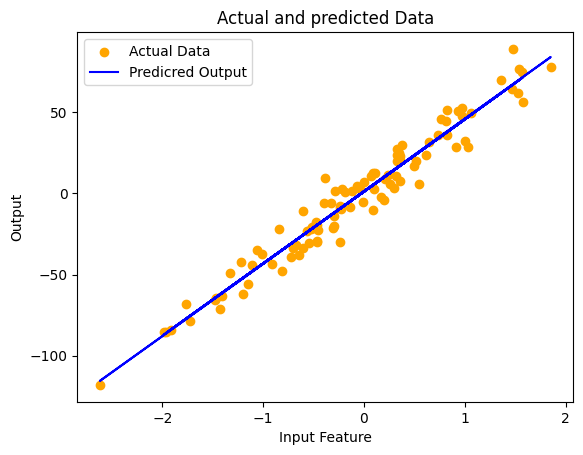

In [14]:
X, y = make_regression(n_samples = 100, n_features=1, noise=10, random_state=42)

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.scatter(X, y, label = "Actual Data", color = "orange")
plt.plot(X, y_pred, label = "Predicred Output", color = "Blue")
plt.xlabel('Input Feature')
plt.ylabel("Output")
plt.title('Actual and predicted Data')
plt.legend()
plt.show();


# Neural Network
<h2>
Neural Networks make the transformation learnable by parametirizing the basis function.
$$ \hat{y} = f(W^T \cdot \phi(X, \theta)) $$

Neural networks apply a linear transformation on top of features transformed in a non-linear way.

</h2>



### Loading the training data set

In [17]:
df = pd.read_csv("mnist_train.csv")

In [18]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train = df.iloc[:, 1:].values # convert to Numpy array
y_train = df.iloc[:, 0].values # Convert to Numpy array

X_train = torch.tensor(X_train, dtype = torch.float32)/255.0 # Normalize Pixle size
y_train = torch.tensor(y_train, dtype = torch.long) # Labels remain integers

In [24]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: torch.Size([60000, 784])
y_train.shape: torch.Size([60000])


### Training the Model

In [25]:
# Using 100 samples at the time to do the training of the model
batch_size = 100
N_epoch = 1000

torch.manual_seed(0) # Ensures the model weight is intialized with the same numbers

model = torch.nn.Sequential(
    torch.nn.Linear(784, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128,64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)

loss = torch.nn.CrossEntropyLoss() # Define the loss funciton ( Categorical Cross Entropy)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # Using Stoachastic Gradient Descent

for epoch in range(1, N_epoch+1):
  for i in range(0, len(X_train), batch_size):
    X = X_train[i: i + batch_size]
    y = y_train[i: i + batch_size]

    y_pred = model(X)

    l = loss(y_pred, y)

    model.zero_grad() # Reset all gradient accumulators
    l.backward() # Compute Gradient
    optimizer.step() # SGD
  if (epoch % 100 ==0):
    print(f"Epoch {epoch:2d}: loss on final training batch: {l.item():.4f}")





Epoch 100: loss on final training batch: 0.1855
Epoch 200: loss on final training batch: 0.0777
Epoch 300: loss on final training batch: 0.0062
Epoch 400: loss on final training batch: 0.0024
Epoch 500: loss on final training batch: 0.0014
Epoch 600: loss on final training batch: 0.0009
Epoch 700: loss on final training batch: 0.0007
Epoch 800: loss on final training batch: 0.0005
Epoch 900: loss on final training batch: 0.0004
Epoch 1000: loss on final training batch: 0.0004


## Testing the Model's performance

In [27]:
df_test = pd.read_csv("mnist_test.csv")

In [29]:
X_test = df_test.iloc[:, 1:].values  # Convert to NumPy array
y_test = df_test.iloc[:, 0].values   # Convert to NumPy array

X_test = torch.tensor(X_test, dtype=torch.float32) / 255.0  # Normalize pixel values
y_test = torch.tensor(y_test, dtype=torch.long)  # Labels remain integers

with torch.no_grad():
  y_pred = model(X_test)
  y_pred_classes = torch.argmax(y_pred, dim = 1)

accuracy = (y_pred_classes == y_test).float().mean().item()
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 97.78%


### Printing a single Sample

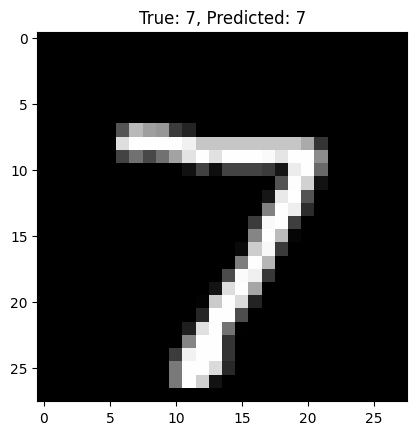

In [30]:
index = 0
sample = X_test[index].reshape(28,28)
true_label =y_test[index].item()
with torch.no_grad():
  pred_label = torch.argmax(model(X_test[index].unsqueeze(0))).item()

# Show the image
plt.imshow(sample, cmap='gray')
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.show()


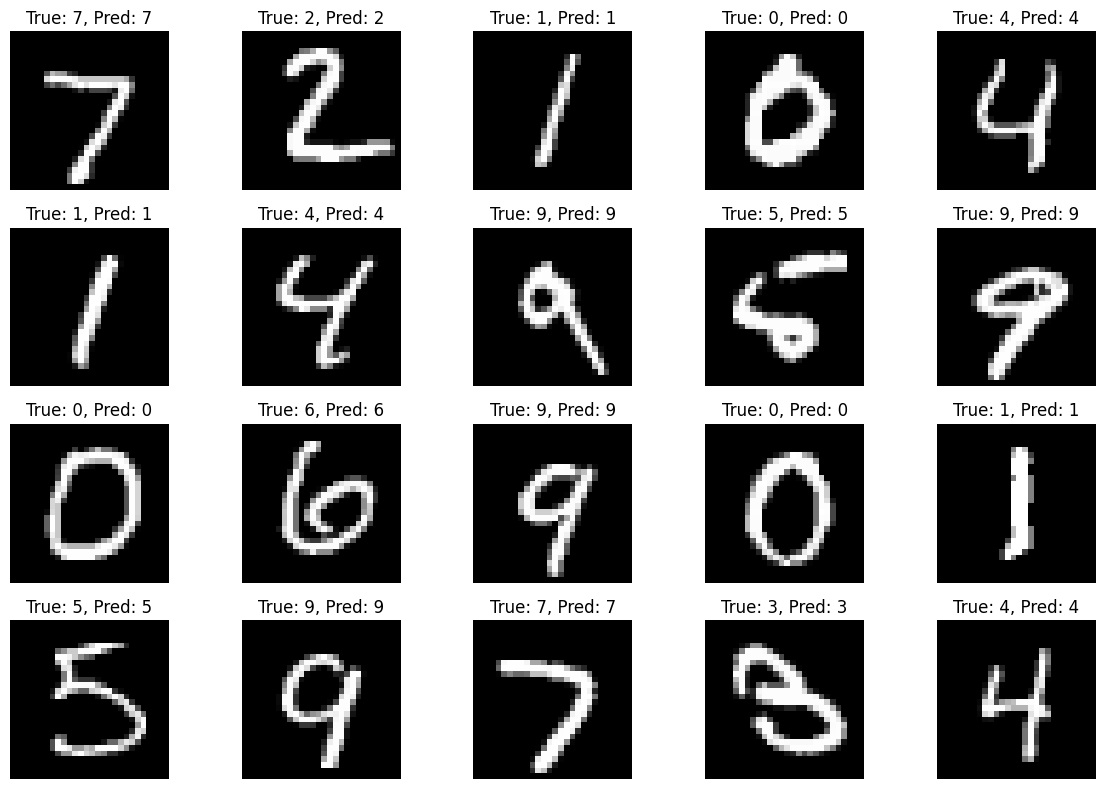

In [35]:
plt.figure(figsize = (12, 8))

for index in range(20):
    sample = X_test[index].reshape(28, 28)
    true_label = y_test[index].item()

    with torch.no_grad():
        pred_label = torch.argmax(model(X_test[index].unsqueeze(0))).item()

    plt.subplot(4, 5, index+1)  # 2x5 grid
    plt.imshow(sample, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

<h2>That's all </h2>